In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
house=pd.read_csv(r"E:/College/Training/Route/House Price Prediction/House Prices Prediction.csv")

In [3]:
house.head()

,Location,Area,Bedroom,Bathroom,Floor,View,Facing,Elevator,Payment System,Price
0,New Administrative Capital,160,3,3,5,Garden,South,Yes,Cash,4400000
1,Heliopolis,140,3,3,4,Apartment Building,North,Yes,Instalment,3500000
2,Zahraa El Maadi,150,3,2,2,Street,North,Yes,Cash,4500000
3,First Settlement,140,3,2,2,Garden,North,Yes,Cash,3100000
4,Rod El Farag,180,3,3,5,Garden,South,Yes,Cash,4300000


In [4]:
house.isnull().sum()

Location          0
Area              0
Bedroom           0
Bathroom          0
Floor             0
View              0
Facing            0
Elevator          0
Payment System    0
Price             0
dtype: int64

In [5]:
house["View"].value_counts()

View
Garden                833
Street                531
Apartment             502
Apartment Building    134
Name: count, dtype: int64

In [6]:
house["Location"].value_counts()

Location
Ain Shams                     35
Muqattam                      35
El Mataria                    35
El Salam                      34
El Marg                       34
El Sharabiya                  34
El Faggala                    34
Zahraa Nasr City              34
Shubra                        34
El Nozha                      34
Madinaty                      34
Hadayek El Ahram              34
Gesr El Suez                  34
El Mostakbal                  34
El Fustat                     34
El Moneeb                     34
Sheraton                      34
El Amireya                    33
Boulak El Dakrour             33
El Waili                      33
Badr                          33
El Azbakeya                   33
Mostorod                      33
El Shorouk                    33
El Abbasiya                   33
El Obour                      33
New Sphinx                    33
Abdeen                        33
El Omraniya                   33
Hadayek October               33
K

## Visualization

In [7]:

movie_type_counts = house['View'].value_counts()

fig = go.Figure(data=go.Pie(labels=movie_type_counts.index, values=movie_type_counts.values))

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  
    paper_bgcolor='rgb(17, 17, 17)', 
    font_color='white',  
    title='Distribution of C. Types',
)
fig.update_traces(marker=dict(colors=['red']))
fig.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20396\1431725558.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




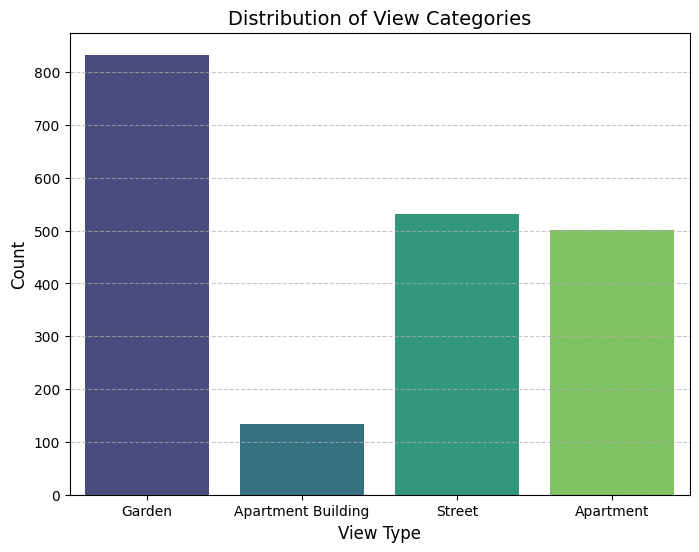

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=house, x="View", palette="viridis")

plt.title("Distribution of View Categories", fontsize=14)
plt.xlabel("View Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

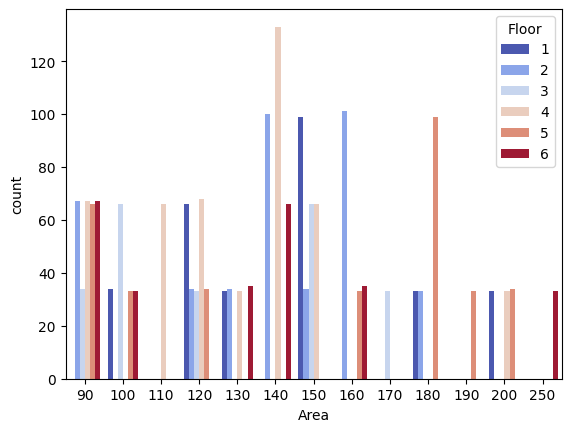

In [9]:
sns.countplot(x="Area",hue="Floor",data=house, palette="coolwarm")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20396\2813483740.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




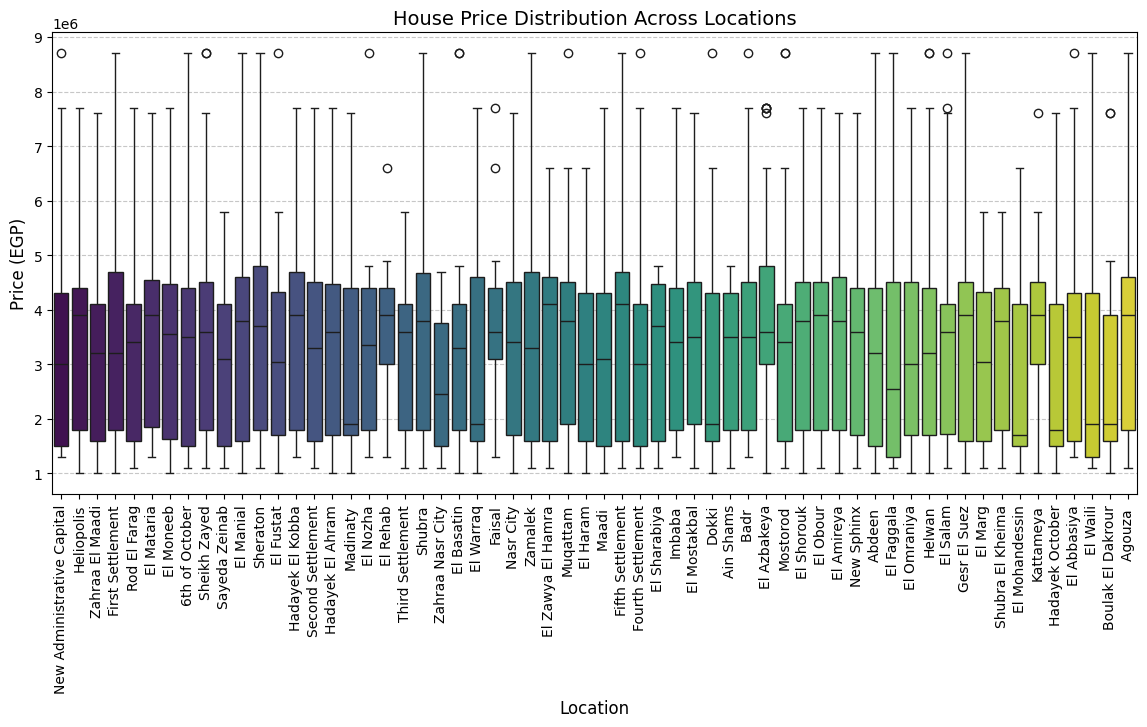

In [10]:
plt.figure(figsize=(14, 6))

sns.boxplot(data=house, x="Location", y="Price", palette="viridis")

plt.xticks(rotation=90)  
plt.title("House Price Distribution Across Locations", fontsize=14)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Price (EGP)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


## Sperate Data

In [11]:
features=house.drop('Price',axis=1)
target=house['Price']

In [12]:
features

,Location,Area,Bedroom,Bathroom,Floor,View,Facing,Elevator,Payment System
0,New Administrative Capital,160,3,3,5,Garden,South,Yes,Cash
1,Heliopolis,140,3,3,4,Apartment Building,North,Yes,Instalment
2,Zahraa El Maadi,150,3,2,2,Street,North,Yes,Cash
3,First Settlement,140,3,2,2,Garden,North,Yes,Cash
4,Rod El Farag,180,3,3,5,Garden,South,Yes,Cash
...,...,...,...,...,...,...,...,...,...
1995,El Omraniya,90,2,1,2,Apartment,North,No,Cash
1996,El Azbakeya,200,4,3,5,Apartment Building,North,No,Instalment
1997,El Salam,120,2,1,4,Garden,South,No,Instalment
1998,El Shorouk,150,3,2,2,Street,North,Yes,Cash


In [13]:
target

0       4400000
1       3500000
2       4500000
3       3100000
4       4300000
         ...   
1995    1800000
1996    7600000
1997    1500000
1998    4500000
1999    4500000
Name: Price, Length: 2000, dtype: int64

## Label Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

features["Location"]=le.fit_transform(features["Location"])
features["View"]=le.fit_transform(features["View"])
features["Facing"]=le.fit_transform(features["Facing"])
features["Elevator"]=le.fit_transform(features["Elevator"])
features["Payment System"]=le.fit_transform(features["Payment System"])


In [15]:
features

,Location,Area,Bedroom,Bathroom,Floor,View,Facing,Elevator,Payment System
0,47,160,3,3,5,2,1,1,0
1,38,140,3,3,4,1,0,1,1
2,57,150,3,2,2,3,0,1,0
3,32,140,3,2,2,2,0,1,0
4,49,180,3,3,5,2,1,1,0
...,...,...,...,...,...,...,...,...,...
1995,22,90,2,1,2,0,0,0,0
1996,9,200,4,3,5,1,0,0,1
1997,23,120,2,1,4,2,1,0,1
1998,25,150,3,2,2,3,0,1,0


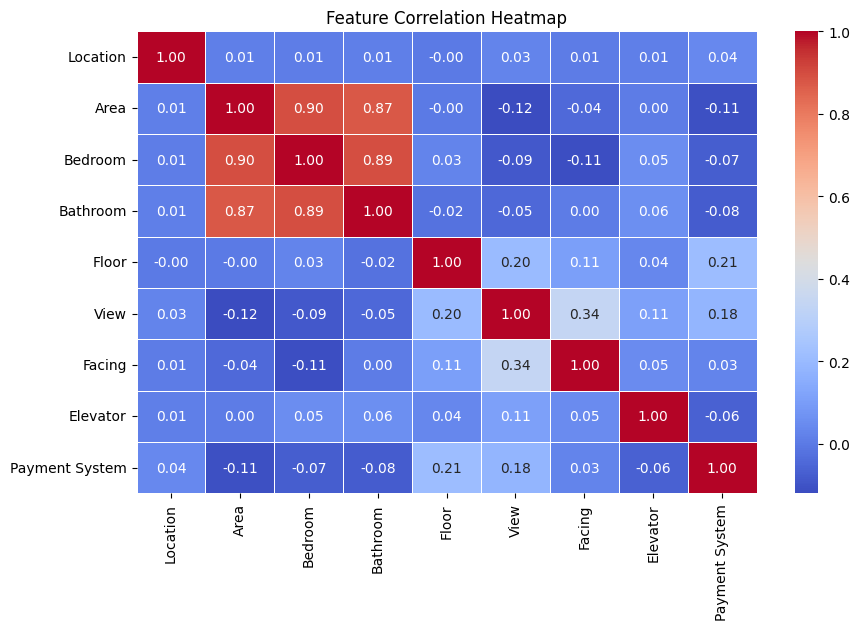

In [16]:
correlation_matrix = features.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## train_test_split

In [17]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(features,target,test_size=.20,random_state=0,stratify=target)

## The Model




In [18]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [19]:
lr.fit(Xtrain,ytrain)

LinearRegression()

In [20]:
ypred=lr.predict(Xtest)

## Evaluate Model Accuracy

In [21]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

print("Mean Abslutes error ",mean_absolute_error(ypred,ytest))
print("Mean squared error ",mean_squared_error(ypred,ytest))
print("Root Mean squared error ",np.sqrt(mean_squared_error(ypred,ytest)))
print("R2 Score",r2_score(ypred,ytest))

Mean Abslutes error  475612.8855550587
Mean squared error  374554476899.3155
Root Mean squared error  612008.5594984073
R2 Score 0.8675201626463351


## Test Model

In [86]:
import numpy as np
import pandas as pd

location_mapping = {
    "New Administrative Capital": 1,
    "First Settlement": 2,
    "Second Settlement": 3,
    "Third Settlement": 4,
    "Fourth Settlement": 5,
    "Fifth Settlement": 6,
    "Madinaty": 7,
    "El Rehab": 8,
    "Kattameya": 9,
    "Zahraa Nasr City": 10,
    "Nasr City": 11,
    "Maadi": 12,
    "Muqattam": 13,
    "Zahraa El Maadi": 14,
    "Sheraton": 15,
    "Heliopolis": 16,
    "Badr": 17,
    "El Obour": 18,
    "El Mostakbal": 19,
    "El Shorouk": 20,
    "El Salam": 21,
    "Gesr El Suez": 22,
    "El Marg": 23,
    "Ain Shams": 24,
    "Mostorod": 25,
    "Shubra El Kheima": 26,
    "Hadayek El Kobba": 27,
    "El Zawya El Hamra": 28,
    "Shubra": 29,
    "Rod El Farag": 30,
    "El Basatin": 31,
    "El Abbasiya": 32,
    "Sayeda Zeinab": 33,
    "Imbaba": 34,
    "El Azbakeya": 35,
    "El Fustat": 36,
    "Agouza": 37,
    "Boulak El Dakrour": 38,
    "El Mataria": 39,
    "El Nozha": 40,
    "El Waili": 41,
    "Abdeen": 42,
    "El Sharabiya": 43,
    "El Amireya": 44,
    "El Manial": 45,
    "Zamalek": 46,
    "El Mohandessin": 47,
    "Dokki": 48,
    "El Haram": 49,
    "El Warraq": 50,
    "El Omraniya": 51,
    "El Moneeb": 52,
    "Hadayek El Ahram": 53,
    "Sheikh Zayed": 54,
    "Hadayek October": 55,
    "New Sphinx": 56,
    "6th of October": 57,
    "El Faggala": 58,
    "Helwan": 59,
    "Faisal": 60
}

view_mapping = {
    "Garden": 1,
    "Street": 2,
    "Building": 3,
    "Apartment Building":4
}

facing_mapping = {
    "North": 1,
    "South": 2

}

elevator_mapping = {
    "Yes": 1,
    "No": 0
}

payment_mapping = {
    "Cash": 0,
    "Installments": 1
}

location_name = input(f"Enter Location {list(location_mapping.keys())}: ")
view_name = input(f"Enter View {list(view_mapping.keys())}: ")
facing_name = input(f"Enter Facing {list(facing_mapping.keys())}: ")
elevator_name = input(f"Enter Elevator (Yes/No): ")
payment_name = input(f"Enter Payment System {list(payment_mapping.keys())}: ")

location = location_mapping.get(location_name)
view = view_mapping.get(view_name)
facing = facing_mapping.get(facing_name)
elevator = elevator_mapping.get(elevator_name)
payment_system = payment_mapping.get(payment_name)

if None in [location, view, facing, elevator, payment_system]:
    print("Error: One or more inputs are invalid. Please check your spelling.")
    exit()

area = float(input("Enter Area (in square meters): "))
bedroom = int(input("Enter Number of Bedrooms: "))
bathroom = int(input("Enter Number of Bathrooms: "))
floor = int(input("Enter Floor Number: "))

new_data = np.array([[location, area, bedroom, bathroom, floor, view, facing, elevator, payment_system]])

new_data = pd.DataFrame(new_data, columns=Xtrain.columns)

predicted_price = lr.predict(new_data)[0]
print(f"Predicted House Price: {predicted_price:,.2f} EGP")



Predicted House Price: 1,648,568.27 EGP


## Save Model


In [87]:
import pickle

with open("house_price_model.pkl", "wb") as f:
    pickle.dump(lr, f)

print("Model saved successfully!")

Model saved successfully!
